In [2]:
import cv2
import numpy as np
import torch
import torchvision.transforms.v2 as T
import torchvision.transforms.v2.functional as TF
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob

random.seed(2025)
torch.manual_seed(2025)
plt.rcParams["savefig.bbox"] = 'tight'

# Get size of image

The image resolution is: 333x500


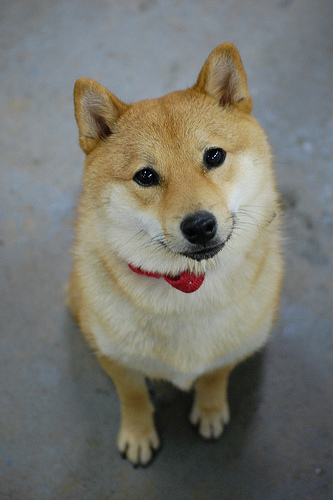

In [4]:
image = Image.open("../Dataset/TrainVal/color/shiba_inu_165.jpg")
width, height = image.size
print(f"The image resolution is: {width}x{height}")
display(image)

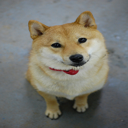

In [5]:
# this squashes the image since not a square, I think its best practice to maintain
# aspect ratio
resized_image = image.resize((128,128))
display(resized_image)

### One method is resize and crop which maintains the aspect ratio and fills the entire target dimensions

In [6]:
# function to resize with crop
def resize_with_crop(image, target_size):
    width, height = image.size
    ratio = max(target_size[0]/width, target_size[1]/height)
    
    # Resize to fit the bigger dimension
    new_size = (int(width*ratio), int(height*ratio))
    resized = image.resize(new_size, Image.LANCZOS)
    
    # Find coordinates for center crop
    left = (new_size[0] - target_size[0])/2
    top = (new_size[1] - target_size[1])/2
    right = (new_size[0] + target_size[0])/2
    bottom = (new_size[1] + target_size[1])/2
    
    # Crop from center
    cropped = resized.crop((left, top, right, bottom))
    return cropped

resized_image = resize_with_crop(image, (128, 128))

New image size: (128, 128)


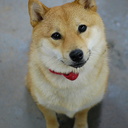

In [7]:
resized_with_crop_image = resize_with_crop(image, target_size=(128, 128))
print(f"New image size: {resized_with_crop_image.size}")
display(resized_with_crop_image)

### Function to resize all images in input directory and save to output directory

In [8]:
def preprocess_dataset(input_dir, output_dir, target_size=(128, 128)):
    """
    Resize all images in input_dir and save to output_dir.
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # Get all image files
    image_paths = glob.glob(os.path.join(input_dir, "*.jpg")) + \
                 glob.glob(os.path.join(input_dir, "*.jpeg")) + \
                 glob.glob(os.path.join(input_dir, "*.png"))
    
    for img_path in image_paths:
        try:
            # Get filename without directory
            filename = os.path.basename(img_path)
            
            # Open and resize image
            image = Image.open(img_path)
            if image.mode != 'RGB':
                image = image.convert('RGB')
                
            # Resize with center crop to maintain aspect ratio
            resized_img = resize_with_crop(image, target_size)
            
            # Save the resized image
            resized_img.save(os.path.join(output_dir, filename))
                    
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

def resize_with_crop(image, target_size):
    width, height = image.size
    ratio = max(target_size[0]/width, target_size[1]/height)
    
    new_size = (int(width*ratio), int(height*ratio))
    resized = image.resize(new_size, Image.LANCZOS)
    
    left = (new_size[0] - target_size[0])//2
    top = (new_size[1] - target_size[1])//2
    right = (new_size[0] + target_size[0])//2
    bottom = (new_size[1] + target_size[1])//2
    
    cropped = resized.crop((left, top, right, bottom))
    return cropped


In [17]:
# Process training set (resize only)
preprocess_dataset(
    "../Dataset/TrainVal/color", 
    "../Dataset/consistent_size/train",
    target_size=(128, 128)
)

In [18]:
# Process test set (resize only)
preprocess_dataset(
    "../Dataset/Test/color", 
    "../Dataset/consistent_size/test",
    target_size=(128, 128)
)

In [9]:
# Process training set labels (masks) (resize only)
preprocess_dataset(
    "../Dataset/TrainVal/label", 
    "../Dataset/consistent_size/TrainVal/label",
    target_size=(128, 128)
)

In [10]:
# Process test set labels (masks) (resize only)
preprocess_dataset(
    "../Dataset/Test/label", 
    "../Dataset/consistent_size/test/label",
    target_size=(128, 128)
)